# Regresión lineal

In [1]:
import statsmodels.api as sm

## Regresión lineal simple

$y = \beta_0 + \beta_1 x + \epsilon$


In [2]:
import numpy as np

x = np.random.rand(10)
x.sort()
y = np.random.rand(10)
print('x=',x,'\ny=',y)

x= [0.07390388 0.20155042 0.3313821  0.45352948 0.46538585 0.48480027
 0.49568124 0.49986043 0.53833256 0.96598237] 
y= [0.48369007 0.28438664 0.7860455  0.49374203 0.86625471 0.44949532
 0.36434044 0.04644474 0.19517576 0.52831261]


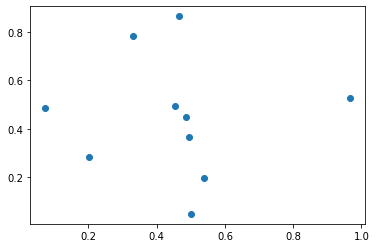

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [4]:
x_ = sm.add_constant(x)
print(x_)

[[1.         0.07390388]
 [1.         0.20155042]
 [1.         0.3313821 ]
 [1.         0.45352948]
 [1.         0.46538585]
 [1.         0.48480027]
 [1.         0.49568124]
 [1.         0.49986043]
 [1.         0.53833256]
 [1.         0.96598237]]


In [5]:
modelo = sm.OLS(y, x_)

In [6]:
resultado = modelo.fit()

In [7]:
resultado.summary()

C:\Users\Daniel\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.125
Method:                 Least Squares   F-statistic:                  0.003476
Date:                Wed, 17 Aug 2022   Prob (F-statistic):              0.954
Time:                        18:37:24   Log-Likelihood:                0.24329
No. Observations:                  10   AIC:                             3.513
Df Residuals:                       8   BIC:                             4.119
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4597      0.188      2.440      0.041       0.025       0.894
x1            -0.0221      0.374     -0.059      0.954      -0.885       0.841
==============================================================================
Omnibus:                        0.109   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.947   Jarque-Bera (JB):                0.217
Skew:                           0.179   Prob(JB):                        0.897
Kurtosis:                       2.373   Cond. No.                         5.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
resultado.params

array([ 0.459745  , -0.02207387])

In [9]:
def reg1(x):
    if isinstance(x, int) or isinstance(x, float):
        return resultado.params[0] + x * resultado.params[1]
    x = np.array(x)
    if len(x) == 1:
        return reg1(x[0])
    else:
        x = sm.add_constant(x)
        y = x * resultado.params
        return sum(y.T)

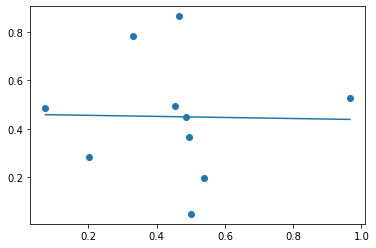

In [10]:
y_ = reg1(x)
plt.scatter(x,y)
plt.plot(x, y_)
plt.show()

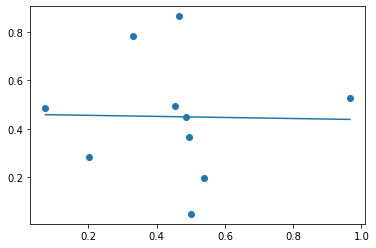

In [11]:
def reg2(x):
    if isinstance(x, int) or isinstance(x, float):
        return resultado.params[0] + x * resultado.params[1]
    return [reg2(i) for i in x]
y_ = reg2(x)
plt.scatter(x,y)
plt.plot(x, y_)
plt.show()

## Regresión con dos variables

$y = \beta_0+\beta_1x_1 + \beta_2x_2$

In [12]:
x = np.random.rand(20, 2)
y = np.random.rand(20)
print('x=\n',x)
print('y=\n',y)

x=
 [[0.9714161  0.41812628]
 [0.89262475 0.04352201]
 [0.69489218 0.5508525 ]
 [0.28579588 0.93784401]
 [0.35307679 0.58805888]
 [0.34446533 0.3078113 ]
 [0.56148341 0.68507212]
 [0.73171753 0.50911469]
 [0.09391352 0.54911306]
 [0.50868437 0.76906071]
 [0.84683056 0.83394277]
 [0.85427646 0.27725919]
 [0.48456898 0.85350108]
 [0.21001724 0.38034521]
 [0.90643466 0.84613677]
 [0.11416514 0.77300012]
 [0.39294304 0.71677551]
 [0.89052731 0.27698796]
 [0.65974273 0.85902987]
 [0.68051368 0.71551808]]
y=
 [0.96913412 0.46796767 0.45198969 0.28146487 0.49027926 0.52451061
 0.45632102 0.90182308 0.21516725 0.10739692 0.12536939 0.53482808
 0.59611538 0.56147824 0.68240327 0.1075259  0.28156455 0.9513792
 0.51664355 0.03195599]


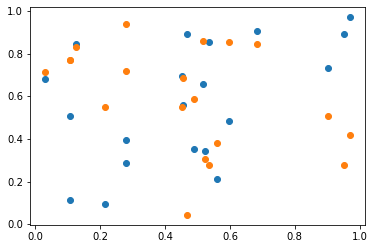

In [13]:
plt.scatter(y, x[:, 0])
plt.scatter(y, x[:, 1])
plt.show()

In [14]:
x_ = sm.add_constant(x)
x_

array([[1.        , 0.9714161 , 0.41812628],
       [1.        , 0.89262475, 0.04352201],
       [1.        , 0.69489218, 0.5508525 ],
       [1.        , 0.28579588, 0.93784401],
       [1.        , 0.35307679, 0.58805888],
       [1.        , 0.34446533, 0.3078113 ],
       [1.        , 0.56148341, 0.68507212],
       [1.        , 0.73171753, 0.50911469],
       [1.        , 0.09391352, 0.54911306],
       [1.        , 0.50868437, 0.76906071],
       [1.        , 0.84683056, 0.83394277],
       [1.        , 0.85427646, 0.27725919],
       [1.        , 0.48456898, 0.85350108],
       [1.        , 0.21001724, 0.38034521],
       [1.        , 0.90643466, 0.84613677],
       [1.        , 0.11416514, 0.77300012],
       [1.        , 0.39294304, 0.71677551],
       [1.        , 0.89052731, 0.27698796],
       [1.        , 0.65974273, 0.85902987],
       [1.        , 0.68051368, 0.71551808]])

In [15]:
modelo = sm.OLS(y, x_)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     4.385
Date:                Wed, 17 Aug 2022   Prob (F-statistic):             0.0291
Time:                        18:37:25   Log-Likelihood:                 1.9850
No. Observations:                  20   AIC:                             2.030
Df Residuals:                      17   BIC:                             5.017
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4680      0.208      2.254      0.038       0.030       0.906
x1             0.3884      0.202      1.923      0.071      -0.038       0.815
x2            -0.3837      0.229     -1.672      0.113      -0.868       0.100
==============================================================================
Omnibus:                        1.274   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.529   Jarque-Bera (JB):                1.026
Skew:                          -0.331   Prob(JB):                        0.599
Kurtosis:                       2.109   Cond. No.                         7.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
def reg_2(x):
    x = np.array(x)
    d = np.shape(x)
    if len(d) == 1 and d[0] == 2:
        x = np.concatenate([[1], x])
        return sum(x * resultado.params)
    elif len(d) == 2:
        return np.array([reg_2(i) for i in x])

Y=
 [0.68485347 0.79800513 0.52652485 0.21913515 0.37949375 0.4836928
 0.42320583 0.55684365 0.29378587 0.3704697  0.47689986 0.6934161
 0.32870027 0.4036417  0.49536936 0.21573564 0.34558256 0.70759919
 0.39461214 0.45775101]


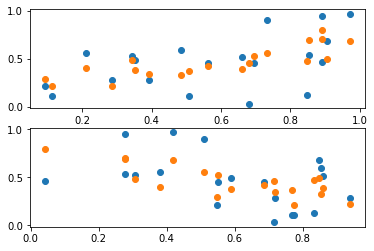

In [17]:
y_ = reg_2(x)
print('Y=\n', y_)
plt.subplot(2,1,1)
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_)
plt.subplot(2,1,2)
plt.scatter(x[:, 1], y)
plt.scatter(x[:, 1], y_)
plt.show()

### Datos desde archivo


In [19]:
import pandas as pd
data = pd.read_excel('../datos.xlsx', sheet_name='Hoja1', index_col=0)
data

,X1,X2
Individuo,,
1,1.6,1.3
2,0.6,1.7
3,-1.4,0.1
4,2.6,1.8
5,-0.4,1.3
6,1.6,0.3
7,3.6,2.3
8,0.6,0.3
9,2.6,0.8


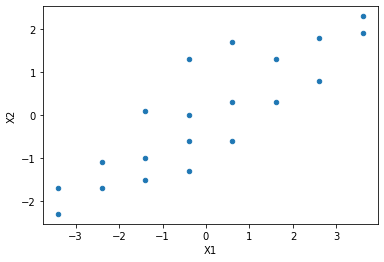

In [21]:
g = data.plot.scatter('X1', 'X2')
plt.show()

In [23]:
y = data['X1']
x = sm.add_constant(data['X2'])
print('x=',x)
print('y=',y)

x=            const   X2
Individuo            
1            1.0  1.3
2            1.0  1.7
3            1.0  0.1
4            1.0  1.8
5            1.0  1.3
6            1.0  0.3
7            1.0  2.3
8            1.0  0.3
9            1.0  0.8
10           1.0 -1.5
11           1.0 -1.3
12           1.0 -0.6
13           1.0 -1.1
14           1.0 -0.6
15           1.0 -1.0
16           1.0 -1.7
17           1.0 -1.7
18           1.0 -2.3
19           1.0  1.9
20           1.0  0.0
y= Individuo
1     1.6
2     0.6
3    -1.4
4     2.6
5    -0.4
6     1.6
7     3.6
8     0.6
9     2.6
10   -1.4
11   -0.4
12   -0.4
13   -2.4
14    0.6
15   -1.4
16   -2.4
17   -3.4
18   -3.4
19    3.6
20   -0.4
Name: X1, dtype: float64


In [24]:
modelo_df = sm.OLS(y, x)

reultado_df = modelo_df.fit()
reultado_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     X1   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     54.02
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           8.02e-07
Time:                        18:42:48   Log-Likelihood:                -29.192
No. Observations:                  20   AIC:                             62.38
Df Residuals:                      18   BIC:                             64.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.441e-16      0.245  -1.81e-15      1.000      -0.516       0.516
X2             1.3233      0.180      7.350      0.000       0.945       1.702
==============================================================================
Omnibus:                        1.027   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.598   Jarque-Bera (JB):                0.939
Skew:                          -0.352   Prob(JB):                        0.625
Kurtosis:                       2.206   Cond. No.                         1.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
modelo_df_ = sm.OLS(data['X1'], data['X2'])

reultado_df_ = modelo_df_.fit()
reultado_df_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     X1   R-squared (uncentered):                   0.750
Model:                            OLS   Adj. R-squared (uncentered):              0.737
Method:                 Least Squares   F-statistic:                              57.02
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                    3.91e-07
Time:                        18:44:32   Log-Likelihood:                         -29.192
No. Observations:                  20   AIC:                                      60.38
Df Residuals:                      19   BIC:                                      61.38
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X2             1.3233      0.175      7.551      0.000       0.957       1.690
==============================================================================
Omnibus:                        1.027   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.598   Jarque-Bera (JB):                0.939
Skew:                          -0.352   Prob(JB):                        0.625
Kurtosis:                       2.206   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
reultado_df_.params

X2    1.323292
dtype: float64

### Fórmula

In [31]:
import statsmodels.formula.api as smf

In [34]:
datos = data.copy()
modelo_3 = smf.ols('X1 ~ X2', data=datos)
modelo_3

In [35]:
resultado_3 = modelo_3.fit()
resultado_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     X2   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     54.02
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           8.02e-07
Time:                        18:50:47   Log-Likelihood:                -20.713
No. Observations:                  20   AIC:                             45.43
Df Residuals:                      18   BIC:                             47.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.274e-16      0.161  -3.28e-15      1.000      -0.338       0.338
X1             0.5668      0.077      7.350      0.000       0.405       0.729
==============================================================================
Omnibus:                        1.904   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.386   Jarque-Bera (JB):                1.243
Skew:                           0.606   Prob(JB):                        0.537
Kurtosis:                       2.847   Cond. No.                         2.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
datos = data.copy()
modelo_4 = smf.ols('X1 ~ X2 - 1', data=datos)
resultado_4 = modelo_4.fit()
resultado_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     X1   R-squared (uncentered):                   0.750
Model:                            OLS   Adj. R-squared (uncentered):              0.737
Method:                 Least Squares   F-statistic:                              57.02
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                    3.91e-07
Time:                        18:53:58   Log-Likelihood:                         -29.192
No. Observations:                  20   AIC:                                      60.38
Df Residuals:                      19   BIC:                                      61.38
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X2             1.3233      0.175      7.551      0.000       0.957       1.690
==============================================================================
Omnibus:                        1.027   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.598   Jarque-Bera (JB):                0.939
Skew:                          -0.352   Prob(JB):                        0.625
Kurtosis:                       2.206   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""